# **Project-World Happiness**





*Completed by Madison Bochard and Alyssa Duran*

---


### **Acknowledgement**
The project is adapted from the AWS/The Coding School Machine Learning training program.

### **Description**
In this project, you will use what you have learned so far about the machine learning process, Linear Regression, and KNN to analyze the official 2015 World Happiness Report from the United Nations. In particular, you will explore, wrangle, and visualize this data and then model the Happiness Score and Region of countries based on the variables reported in this dataset.

<br>


### **Overview**
For this project, you are given data collected for the 2015 UN Happiness Report. The 2015 Happiness Report, also known as the World Happiness Report 2015, is a publication that presents rankings of countries based on their levels of happiness and well-being. The report is a collaborative effort between the Sustainable Development Solutions Network (SDSN) and the Earth Institute at Columbia University, with contributions from various researchers and experts.

<br>

The report includes rankings of 158 countries based on the "World Happiness Index," which is calculated using survey data from the Gallup World Poll and other sources. The index combines factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption to assess overall happiness levels.

<br>

The 2015 Happiness Report sheds light on the relationship between happiness, well-being, and sustainable development, emphasizing the importance of incorporating measures of happiness into policy-making and development strategies. It provides valuable insights into global happiness levels, highlighting the factors that contribute to happiness and offering recommendations for policymakers and individuals to improve overall well-being.

<br>

 Everything you need is provided below. But, if you are curious to learn more the [official source can be found here](https://worldhappiness.report/ed/2015/#appendices-and-data). Here is a list of variables for your reference:

* `Country`: The country that the data corresponds to.

* `Region`: The region that this country is classified as belong to.

* `Happiness Score`: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* `GDP`: The extent to which GDP contributes to the calculation of the Happiness Score.

* `Social Support`: The extent to which Family contributes to the calculation of the Happiness Score

* `Health Life Expectancy`: The extent to which Life expectancy contributed to the calculation of the Happiness Score

* `Freedom`: The extent to which Freedom contributed to the calculation of the Happiness Score.

* `Corruption Perception`: The extent to which Perception of Corruption contributes to Happiness Score.

* `Generosity`: A model of the national average of response to the question “Have you donated money to a charity in the past month?” on GDP per
capita.

**NOTE**: All numerical variables except `Happiness Score` have already been standardized.

<br>

### **Key questions to consider**
1. How do these variables, such as `Generosity` or `Freedom`, influence a country's `Happiness Score`?

2. In 2015, which nation had the highest `Happiness Score`? Which nation had the lowest `Happiness Score`?

2. What patterns can be observed visually? What patterns can be observed with deeper data exploration?

3. Is Linear Regression or KNN better suited to this task of predicting Happiness Score or Region and why?

4. What is the best value of K for any case where you used KNN?

5. What role did feature selection play in the performance of models for both cases?

6. What variables play the largest role in predicting Happiness Score or Region?

<br>

### **Project Structure**
**Part 1**:  [Data Exploration, Wrangling, and Visualization](#p1)

**Part 2**:  [Predicting Happiness Score](#p2)

> **Part 2.1**: [Using All Numerical Features](#p21)
>
> **Part 2.2**: [Using the 3 Best Numerical Features](#p22)
>
>
>

**Part 3**: [Predicting Region](#p3)

> **Part 3.1**: [Using All Numerical Features](#p31)
>
> **Part 3.2**: [Using the 2 Best Numerical Features](#p32)
>
>
>

</br>



### **Cheat Sheets**

* [Python Basics](https://docs.google.com/document/d/1jC6zIdBukfEoJ8CesGf_usCtK2P6pJTWe5oxopC49aY/edit?usp=drive_link)

* [EDA with pandas](https://docs.google.com/document/d/1hMsWa7ziMulT0WjoCaqLTkpoqilCO12HlOrVy4-_zwY/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1IA-sgjUvrQYyKlcBxFN-PIsHMEMrixwd6sh9RlMkubQ/edit?usp=drive_link)

* [Linear Regression with sklearn](https://docs.google.com/document/d/1uJueuaBhszyXJ1UeRZU25Ux6LgW7m7YtG1GA5x_O120/edit?usp=drive_link)

* [KNN with sklearn](https://docs.google.com/document/d/1X-aC73lEWaYwzzG9AQJCJSyCFxLvGf2rFnK6hlE_Gy8/edit?usp=drive_link)

<br>

**Provide comments/justification as much as you can using # or text box.**

### **First of all, import all necessary libraries and functions.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

<a name="p1"></a>

---
## **Part 1: Data Exploration, Wrangling, and Visualization**
---

In this part, you will load in and explore the dataset for this project. This will involve using functions from pandas as well as reading source material to understand the data that you are working with.

<br>
The data file can be found at https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv

**Write your code to read the data.**

In [ ]:
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv"
happy_df = pd.read_csv(url)

### **Problem #1.1**

Spend a few minutes getting familiar with the data. Some things to consider: how many instances are there? How many features? What are the features' datatypes?

In [ ]:
print("First five rows of the dataset:")
print(happy_df.head())
print('\n')
print("Overview of the dataset:")
print(happy_df.info())
print('\n')
print("Range of the dataset:")
print(happy_df.index)
print('\n')
print("Descriptive statistics of the dataset:")
print(happy_df.describe())

First five rows of the dataset:
       Country          region  Happiness Score      GDP  Social_support  \
0  Switzerland  Western Europe            7.587  1.39651         1.34951   
1      Iceland  Western Europe            7.561  1.30232         1.40223   
2      Denmark  Western Europe            7.527  1.32548         1.36058   
3       Norway  Western Europe            7.522  1.45900         1.33095   
4       Canada   North America            7.427  1.32629         1.32261   

   Healthy Life_Expectancy  Freedom  corruptionperception  Generosity  
0                  0.94143  0.66557               0.41978     0.29678  
1                  0.94784  0.62877               0.14145     0.43630  
2                  0.87464  0.64938               0.48357     0.34139  
3                  0.88521  0.66973               0.36503     0.34699  
4                  0.90563  0.63297               0.32957     0.45811  


Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16

**Interpret the results here**

There are 163 total instances. Three rows contain null values: region, Happiness Score, and Healthy Life_Expectancy. There are 9 features total with two features (Country, region) having an "object" data type and seven having a data type of "float64." The features are: Country, region, Happiness Score, GDP, Social_support, Healthy Life_Expectancy, and Freedom. Column names are not in a unified format.

Based off of the data, either Region or Happiness Score could be values worth prediciting using a model. Country could also be worth predicting, but trying to accurately predict a specific country would most likely require a very complex model. For this set, it is better to treat Country as an identifier.

### **Problem #1.2**

This data currently has no consistent naming convention for columns, which is very bad practice. So, rename each column to be of the style, `'Column Name'`, where each word is separated by a space (not an underscore, slash, or anything else) and starts uppercase. Furthermore, make sure all words are spelled correctly.
<br>

In [ ]:
happy_df = happy_df.rename(columns={'region':'Region','Social_support':'Social Support','Healthy Life_Expectancy':'Healthy Life Expectancy',
                                    'corruptionperception':'Corruption Perception'})
happy_df.head()

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### **Problem #1.3**

Drop any duplicate rows.

In [ ]:
happy_df = happy_df.drop_duplicates()

### **Problem #1.4**

Determine the datatypes of each feature. Determine the number of non-null values in each column.

In [ ]:
print("Datatypes of each column:")
print(happy_df.dtypes)
print('\n')


df_find = happy_df.isnull().any(axis=1)
df_null = happy_df[df_find]
print('Null Values:')
print(df_null)

Datatypes of each column:
Country                     object
Region                      object
Happiness Score            float64
GDP                        float64
Social Support             float64
Healthy Life Expectancy    float64
Freedom                    float64
Corruption Perception      float64
Generosity                 float64
dtype: object


Null Values:
    Country                      Region  Happiness Score      GDP  \
13  Austria              Western Europe              NaN  1.33723   
53  Moldova  Central and Eastern Europe            5.889  0.59448   
64    Libya                         NaN            5.754  1.13145   

    Social Support  Healthy Life Expectancy  Freedom  Corruption Perception  \
13         1.29704                  0.89042  0.62433                0.18676   
53         1.01528                      NaN  0.32818                0.01615   
64         1.11862                  0.70380  0.41668                0.11023   

    Generosity  
13     0.33088  
53

###### **Interpret your results here**

There are 9 features total with two features (Country and Region) having an "object" data type and seven (Happiness Score, GDP, Social Support, Healthy Life Expectancy, Freedom, Corruption Perception, and Generosity) having a data type of "float64."

There is now only 158 total instances once duplicate rows were removed. There are three null values. The null values are in the Region, Happiness Score, and Healthy Life Expectancy columns.

### **Problem #1.5**

You should have seen from Problem #1.4 that there are 3 columns with null values.
Explain how do you plan to deal with them in details.

In [ ]:
#Null value in 'Region'
print(happy_df.loc[64, 'Country':'Region'])
happy_df.loc[64, 'Region'] = 'Middle East and Northern Africa'
print('\n')
print(happy_df.loc[64, 'Country':'Region'])

Country    Libya
Region       NaN
Name: 64, dtype: object


Country                              Libya
Region     Middle East and Northern Africa
Name: 64, dtype: object


In [ ]:
#Null value in 'Happiness Score'
region_hs = ['Western Europe']
result_region_hs = happy_df[happy_df['Region'].isin(region_hs)]
average_hs = result_region_hs['Happiness Score'].mean()
happy_df['Happiness Score'] = happy_df['Happiness Score'].fillna(value=average_hs)

<ipython-input-8-cf2a63450e7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_df['Happiness Score'] = happy_df['Happiness Score'].fillna(value=average_hs)


In [ ]:
#Null value in 'Healthy Life Expectancy'
region_hle = ['Central and Eastern Europe']
result_region_hle = happy_df[happy_df['Region'].isin(region_hle)]
average_hle = result_region_hle['Healthy Life Expectancy'].mean()
happy_df['Healthy Life Expectancy'] = happy_df['Healthy Life Expectancy'].fillna(value=average_hle)

<ipython-input-9-bc244848ce78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_df['Healthy Life Expectancy'] = happy_df['Healthy Life Expectancy'].fillna(value=average_hle)


In [ ]:
#Check for nulls
df_find2 = happy_df.isnull().any(axis=1)
df_null2 = happy_df[df_find2]
print('Null Values:')
print(df_null2)

Null Values:
Empty DataFrame
Columns: [Country, Region, Happiness Score, GDP, Social Support, Healthy Life Expectancy, Freedom, Corruption Perception, Generosity]
Index: []


##### **Justify/explain your code here**

Null in Region:
The row containing a Null value in the 'Region' column will have that country's region added in since the knowledge worker can find that information.This option may not be plausible in a bigger dataset, but this dataset is relatively small.

Null in Happiness Score and Healthy Life Expectancy: Implemented imputation on the Happiness Score and the Healthy Life Expectancy columns to replace the null values. The average was taken based on region in order to get as accurate of an imputation as possible. The average of the region's values would be closer to the real value than if the average of the entire column was used. This method was used because the data set is small.

### **Problem #1.6**

Now that the data should be clean, take some time to understand the variables in this dataset, by looking at the [official statistical appendix/codebook here](https://s3.amazonaws.com/happiness-report/2015/StatisticalAppendixWHR3-April-16-2015.pdf) and answering the multiple choice questions below.

You will only need to refer to the first 2.5 pages of information, until they start mentioning the "expanded data set". You do not need to read anything after this.

<br>

**1. Which of the following best describes the `Happiness Score`?**

>**a.** We can also call this measure the "life ladder”.

>**b.** We can also call this measure the “objective well-being”.

>**c.** This is a measure of how many ladders people own in a country on average. The more ladders, the happier the people.

>**d.** Respondents were asked how happy they were on a scale of 1 - 10.

<br>

**2. How is `Social Support` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “If you were in trouble, would you have support?”

>**d.** Respondents were asked, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

<br>

**3. How is `Freedom` measured?**

>**a.** This represents the average of responses on a scale of 1 - 10.

>**b.** This is measured differently for each country.

>**c**. Respondents were asked, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

>**d.** Respondents were asked, “How free are you?”

In [ ]:
# ANSWER TO 1
# a. We can also call this measure the "life ladder”.

In [ ]:
# ANSWER TO 2
# d. Respondents were asked, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

In [ ]:
# ANSWER TO 3
# c. Respondents were asked, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

### **Problem #1.7**

Determine the average (mean) and standard deviation (std) of the numerical variables.

In [ ]:
print('Mean:\n', happy_df.mean(numeric_only=True))
print('\n')
print('Std:\n',happy_df.std(numeric_only=True))

Mean:
 Happiness Score            5.372342
GDP                        0.846137
Social Support             0.991046
Healthy Life Expectancy    0.630918
Freedom                    0.428615
Corruption Perception      0.143422
Generosity                 0.237296
dtype: float64


Std:
 Happiness Score            1.140356
GDP                        0.403121
Social Support             0.272369
Healthy Life Expectancy    0.247184
Freedom                    0.150693
Corruption Perception      0.120034
Generosity                 0.126685
dtype: float64


#### **Interpret your findings here**

The mean and standard deviation of the columns show us how much the values vary. Because the mean of Generosity is only about 0.24 and its standard deviation is only about 0.13, we know that the values in the Generosity field are lower overall. My guess is that Generosity may not play a big part in predicting the class variable because it is lower overall regardless of the country. So Generosity is not likely to contribute as much to the model.

We can also tell that Social Support, GDP, and Healthy Life Expectancy are most likely to contribute the most to Happiness Score.

### **Problem #1.8**

Determine all the regions that were included in this dataset.

In [ ]:
print(happy_df['Region'].value_counts())
print('\n')

regions = happy_df['Region'].unique()
count = 0
for name in regions:
  count = count + 1
  print(count, name)

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


1 Western Europe
2 North America
3 Australia and New Zealand
4 Middle East and Northern Africa
5 Latin America and Caribbean
6 Southeastern Asia
7 Central and Eastern Europe
8 Eastern Asia
9 Sub-Saharan Africa
10 Southern Asia


### **Problem #1.9**

You may have noticed that Region is a categorical feature. You need to encode it into numerical values.
Write code to encode it into a feature called `Region Encoded`, according to what is given below.

`0: Western Europe `

`1: North America`

`2: Australia and New Zealand`

`3: Middle East and Northern Africa`

`4: Latin America and Caribbean`

`5: Southeastern Asia `

`6: Central and Eastern Europe`

`7: Eastern Asia`

`8: Sub-Saharan Africa`

`9: Southern Asia`




In [ ]:
region_cleanup = {"Region":{"Western Europe":0, "North America":1, "Australia and New Zealand":2, "Middle East and Northern Africa":3, "Latin America and Caribbean":4,
                            "Southeastern Asia":5, "Central and Eastern Europe":6, "Eastern Asia":7, "Sub-Saharan Africa":8, "Southern Asia":9}}
happy_df = happy_df.replace(region_cleanup)
print(happy_df['Region'].value_counts())

Region
8    40
6    29
4    22
0    21
3    20
5     9
9     7
7     6
1     2
2     2
Name: count, dtype: int64


### **Problem #1.10**

Visualization is an important tool in EDA. In this section, use visualization technqiues as you see fit to understand the data in depth. Try to be creative and thorough.

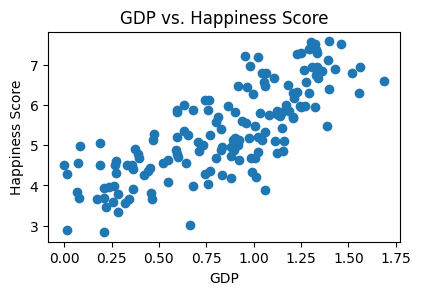

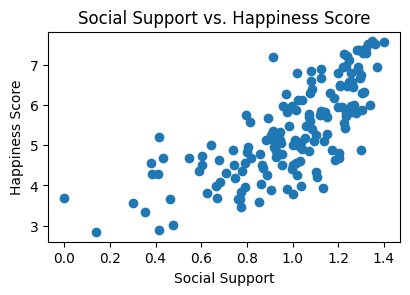

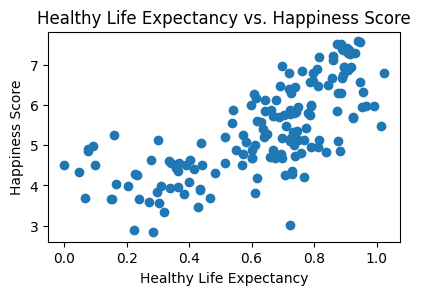

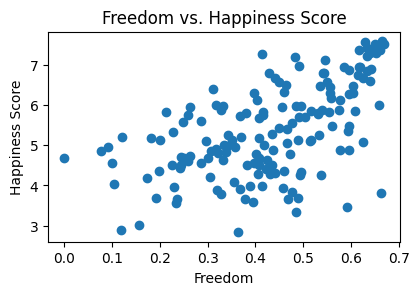

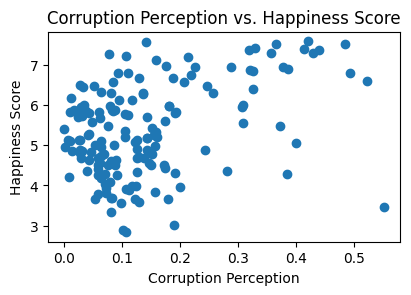

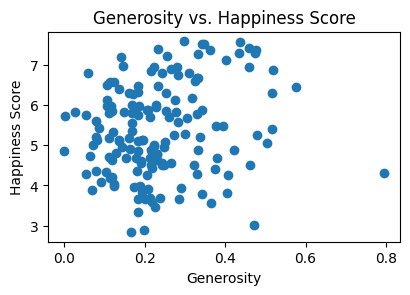

In [ ]:
# insert your code here
# feel free to divide your code into several code boxes by techniques or other factor
plt.rcParams["figure.figsize"] = (10,6)

plt.subplot(2,2,4)
plt.scatter(happy_df['GDP'], happy_df['Happiness Score'])
plt.title('GDP vs. Happiness Score')
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.show()

plt.subplot(2,2,4)
plt.scatter(happy_df['Social Support'], happy_df['Happiness Score'])
plt.title('Social Support vs. Happiness Score')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

plt.subplot(2,2,4)
plt.scatter(happy_df['Healthy Life Expectancy'], happy_df['Happiness Score'])
plt.title('Healthy Life Expectancy vs. Happiness Score')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

plt.subplot(2,2,4)
plt.scatter(happy_df['Freedom'], happy_df['Happiness Score'])
plt.title('Freedom vs. Happiness Score')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

plt.subplot(2,2,4)
plt.scatter(happy_df['Corruption Perception'], happy_df['Happiness Score'])
plt.title('Corruption Perception vs. Happiness Score')
plt.xlabel('Corruption Perception')
plt.ylabel('Happiness Score')
plt.show()

plt.subplot(2,2,4)
plt.scatter(happy_df['Generosity'], happy_df['Happiness Score'])
plt.title('Generosity vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

##### **Provide justification/details here if needed**

These visualizations show the relationship between each independent variable and the dependent variable.

### **Reflection Questions-Insert your answer after each question**
---
1. Is there a noticeable difference in happiness scores between different regions?

  - Somewhat. The scale of Happiness Score is 0-10, but the min of this dataset is 4.2028 and the max is 7.285. I expected a larger range of Happiness Scores between the ten regions.

2. Does any region display a significant disparity between its country with the highest happiness score and its country with the lowest?

  - The region with the biggest disparity in happiness score between its highest and lowest countries is Region 3 - Middle East and Northern Africa.
        Region     max    min  difference
          3       7.278  3.006   4.272

3. How do variables such as `Social Support`, `GDP`, and `Freedom` influence a country's happiness score? Do any variables seem to influence a country's happiness score more than others?

  - GDP and Social Support are highly correlated to the Happiness Score of a country while Freedom's correlation to the Happiness Score is more mid-range. Healthy Life Expectancy has a higher correlation than Freedom.

                              Region	Happiness Score	GDP	Social Support	Healthy Life Expectancy	Freedom	Corruption Perception	Generosity

          Happiness Score	-0.689062	  1.000000	  0.780506	0.740265	          0.724907	       0.566642	      0.395731	        0.178843

4. What are other relationships between variables that you think may be useful to visualize? What kind of data visualization graph would you use?

  - Showing the relationships between each independent variable in order to determine which variables are strongly correlated to each other would be useful in determining which attributes to keep during attribute reduction. Scatter plots or line graphs would represent this information best.

5. Consider the conceptual definitions of the features provided in the dataset. Are there any features that seem ambiguous or open to interpretation? How might these conceptual definitions impact the accuracy and reliability of the models when predicting happiness levels?

  - Happiness is inherently subjective. You can find patterns amongst different cultural and socioeconomic contexts, but there still can be outlier people whose happiness can differ from others in their cultural or socioeconomic group. Freedom has this similar problem of subjectivity.

  - Corruption Perception is subjective, but there is also the caveat that if the perception of government corruption is missing, then the perception of business corruption is marked down as the total corruption perception instead of the average of the two. This can cause an issue with the data since a person may have a worse perception of business corruption compared to government perception and vice versa.

6. Reflect on the cultural and contextual factors that may influence the interpretation and relevance of the features in different countries. How might the meaning of a specific feature differ across diverse cultural and socioeconomic contexts?

  - Freedom would be seen differently across different cultures and socioeconomic contexts. For example, some cultures are heavily influenced by religion. There may be little seperation between the religion and political policies. This concept would make some people in certain cultures feel like there were less freedoms while people currently living in highly religious regions may not feel limited by policies based in their practicing religion.

  - In terms of socioeconomic contexts, a wealthier person may feel that they have more freedom in a country versus a poorer person living in that same country. A person in a majority group may also feel they have more freedoms in a country than a person in a minority group.

In [ ]:
happy_df.groupby('Region').mean(numeric_only=True)

,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
Region,,,,,,,
0,6.664100,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109
1,7.273000,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580
2,7.285000,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315
3,5.406900,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376
4,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788
5,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261
6,5.332931,0.942438,1.053042,0.722364,0.358269,0.086674,0.152264
7,5.626167,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885
8,4.202800,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137


In [ ]:
minMax = happy_df.groupby('Region')['Happiness Score'].agg(['mean','count','max','min'])
minMax['difference'] = minMax['max'] - minMax['min']
print(minMax)

            mean  count    max    min  difference
Region                                           
0       6.664100     21  7.587  4.857       2.730
1       7.273000      2  7.427  7.119       0.308
2       7.285000      2  7.286  7.284       0.002
3       5.406900     20  7.278  3.006       4.272
4       6.144682     22  7.226  4.518       2.708
5       5.317444      9  6.798  3.819       2.979
6       5.332931     29  6.505  4.218       2.287
7       5.626167      6  6.298  4.874       1.424
8       4.202800     40  5.477  2.839       2.638
9       4.580857      7  5.253  3.575       1.678


In [ ]:
happy_df.corr(numeric_only=True)

,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
Region,1.000000,-0.689062,-0.692340,-0.501211,-0.710745,-0.381365,-0.341903,-0.163055
Happiness Score,-0.689062,1.000000,0.780506,0.740265,0.724907,0.566642,0.395731,0.178843
GDP,-0.692340,0.780506,1.000000,0.645299,0.814451,0.370300,0.307885,-0.010465
Social Support,-0.501211,0.740265,0.645299,1.000000,0.531114,0.441518,0.205605,0.087513
Healthy Life Expectancy,-0.710745,0.724907,0.814451,0.531114,1.000000,0.358533,0.245383,0.107700
Freedom,-0.381365,0.566642,0.370300,0.441518,0.358533,1.000000,0.493524,0.373916
Corruption Perception,-0.341903,0.395731,0.307885,0.205605,0.245383,0.493524,1.000000,0.276123
Generosity,-0.163055,0.178843,-0.010465,0.087513,0.107700,0.373916,0.276123,1.000000


##### **Any other interesting findings?**

<a name="p2"></a>

---
## **Part 2: Predicting Happiness Score**
---

Now you will create, evaluate, and train a machine learning model to predict the happiness score of a country based on the provided numerical features. You are required to use both KNN and Linear regression.
<br>

You will do this two times as follows:

**Part 2.1**: Using All Numerical Features

**Part 2.2**: Using the 3 Best Numerical Features

<a name="p21"></a>

---
### **Part 2.1: Using All Numerical Features**
---
For each technique you choose, you should perform the following steps:
1. Load in the data
2. Decide independent and dependent variables
3. Split data into training and testing data
4. Import the algorithm
5. Initializa the model and set hyperparameters if applicable (you may need to try several different values for a hyperparameter)
6. Fit your model and make a prediction
7. Evaluate the model's performance using multiple proper metrics
8. Use the model

In [ ]:
#Called on the dataframe since data is clean
happy_df.head(5)

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
0,Switzerland,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [ ]:
#Split data into independent and dependent variables
happy_features = happy_df.drop(columns=['Country','Happiness Score'])
happy_label = happy_df['Happiness Score']

**Linear Regression**

In [ ]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(happy_features, happy_label, test_size=0.2, random_state=42)

In [ ]:
#Initialize the model
happy_reg = LinearRegression()

In [ ]:
#Fit the model
happy_reg.fit(x_train, y_train)

#Make a prediction
happy_reg_pred = happy_reg.predict(x_test)

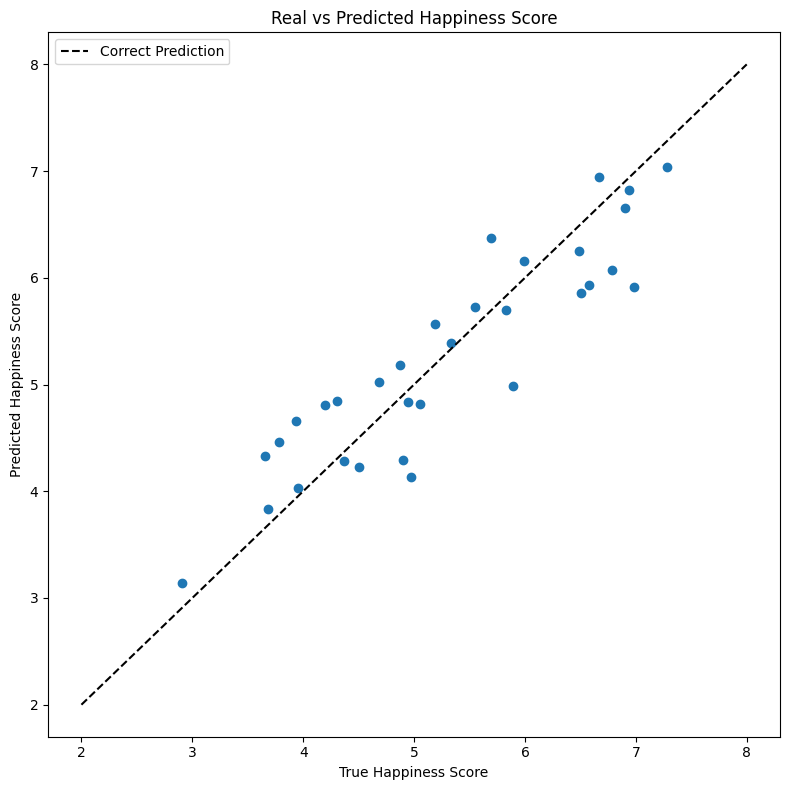

In [ ]:
# Visualization
plt.figure(figsize=(8, 8))
plt.scatter(y_test, happy_reg_pred)
plt.plot([2, 8], [2, 8], '--k', label="Correct Prediction")
plt.axis('tight')
plt.xlabel('True Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title("Real vs Predicted Happiness Score")
plt.legend()
plt.tight_layout()

In [ ]:
#Evaluate the model's performance
print('Mean Sqaured: ', metrics.mean_squared_error(y_test, happy_reg_pred))
print('R2 Score: ', metrics.r2_score(y_test, happy_reg_pred))

Mean Sqaured:  0.24594359312398903
R2 Score:  0.8196983521180784


**KNN**

In [ ]:
#First, in order to use KNN, Happiness Score must be converted to categorical values
#The values to be used will be:
#0-3 - Low
#4-6 - Medium
#7-10 - High

knn_label = pd.cut(x=happy_df['Happiness Score'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])
knn_label.value_counts()

Happiness Score
Medium    112
High       44
Low         2
Name: count, dtype: int64

In [ ]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(happy_features, knn_label, test_size=0.2, random_state=42)

In [ ]:
#Initialize the model and set hyperparameters
#Starting with k = 3 as a random value of k
happy_knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
#Fit the model
happy_knn.fit(x_train, y_train)

#Make a prediction
happy_knn_pred = happy_knn.predict(x_test)

In [ ]:
#Evaluate the model's performance
print("Accuracy Score: ", metrics.accuracy_score(y_test, happy_knn_pred))

Accuracy Score:  0.9375


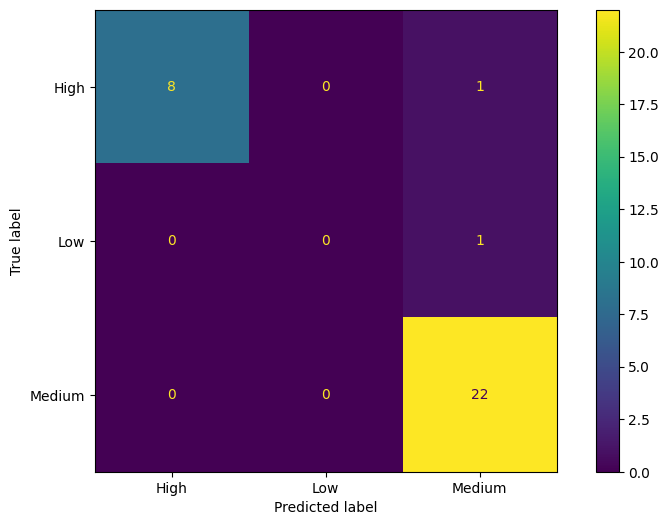

In [ ]:
# Confustion Metrix
metrics.ConfusionMatrixDisplay.from_estimator(happy_knn, x_test, y_test)

{1: 87.5, 3: 93.75, 5: 93.75, 7: 90.625, 9: 90.625, 11: 87.5, 13: 87.5, 15: 84.375, 17: 84.375, 19: 81.25, 21: 84.375, 23: 81.25, 25: 78.125, 27: 75.0, 29: 75.0, 31: 75.0, 33: 75.0, 35: 75.0, 37: 75.0, 39: 75.0, 41: 75.0, 43: 75.0, 45: 75.0, 47: 78.125, 49: 78.125, 51: 78.125, 53: 78.125, 55: 78.125, 57: 78.125, 59: 78.125, 61: 78.125, 63: 78.125, 65: 78.125, 67: 68.75, 69: 68.75, 71: 68.75, 73: 68.75, 75: 68.75, 77: 68.75, 79: 68.75, 81: 68.75, 83: 68.75, 85: 68.75, 87: 68.75, 89: 68.75, 91: 68.75, 93: 68.75, 95: 68.75, 97: 68.75, 99: 68.75}


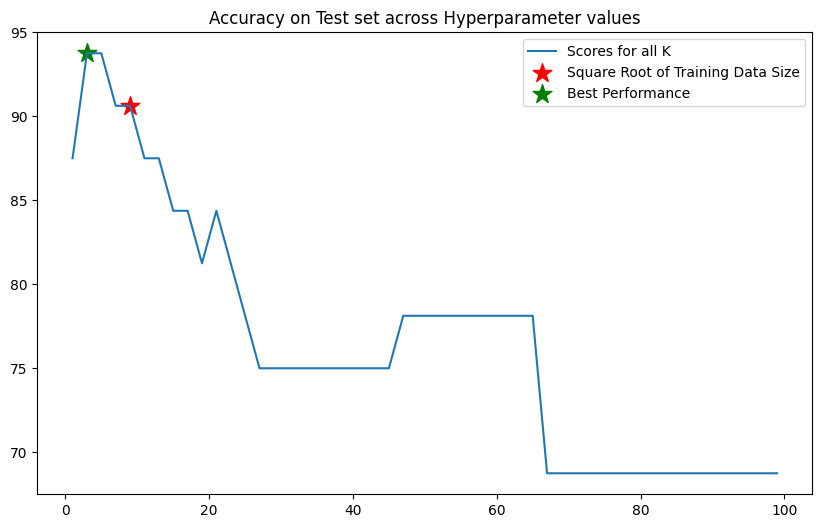

Top score of optimal classifier: 93.75
Best Value of N to use 3


In [ ]:
#KNN Hyperparameter tuning

scores = {}
for n in range(1,100,2):
  full_model = KNeighborsClassifier(n_neighbors= n)
  full_model.fit(x_train, y_train.to_numpy().reshape(-1))
  pred = full_model.predict(x_test)
  score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred) * 100
  scores[n] = score

plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# Adding the performance for K = SQRT size for reference
k = int(len(x_train)**(1/2)/2) * 2 -1
full_model = KNeighborsClassifier(n_neighbors= k)
full_model.fit(x_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(x_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred) * 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')

top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k],[top_score], color = 'g', marker = '*', s = 200, label = 'Best Performance')

plt.legend()
plt.show()

# Printing the results
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

#### **Step #8: Use the model**

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4

**Country 1**

In [ ]:
#Create a dataframe using the Country 1 information in order to predict its happiness score
c1 = pd.DataFrame([[0, 0.9, 0.4, 0.8, 0.4, 0.2, 0.09]], columns = ["Region", "GDP", "Social Support", "Healthy Life Expectancy",
                                                                            "Freedom", "Corruption Perception", "Generosity"])

In [ ]:
#Linear Regression
c1_reg_pred = happy_reg.predict(c1)

In [ ]:
#KNN
c1_knn_pred = happy_knn.predict(c1)

In [ ]:
#Prediction Outputs
print('Country 1 Linear Regression Prediction: ', c1_reg_pred)
print('Country 1 KNN Prediction: ', c1_knn_pred)

Country 1 Linear Regression Prediction:  [5.07969694]
Country 1 KNN Prediction:  ['Medium']


**Country 2**

In [ ]:
#Create a dataframe using the Country 2 information in order to predict its happiness score
c2 = pd.DataFrame([[9, 0.9, 0.4, 0.8, 0.4, 0.2, 0.09]], columns = ["Region", "GDP", "Social Support", "Healthy Life Expectancy",
                                                                            "Freedom", "Corruption Perception", "Generosity"])

In [ ]:
#Linear Regression
c2_reg_pred = happy_reg.predict(c2)

In [ ]:
#KNN
c2_knn_pred = happy_knn.predict(c2)

In [ ]:
#Prediction Outputs
print('Country 2 Linear Regression Prediction: ', c2_reg_pred)
print('Country 2 KNN Prediction: ', c2_knn_pred)

Country 2 Linear Regression Prediction:  [4.47117238]
Country 2 KNN Prediction:  ['Medium']


**Country 3**

In [ ]:
#Create a dataframe using the Country 3 information in order to predict its happiness score
c3 = pd.DataFrame([[4, 1.1, 0.9, 1.01, 0.9, 0.1, 0.9]], columns = ["Region", "GDP", "Social Support", "Healthy Life Expectancy",
                                                                            "Freedom", "Corruption Perception", "Generosity"])

In [ ]:
#Linear Regression
c3_reg_pred = happy_reg.predict(c3)

In [ ]:
#KNN
c3_knn_pred = happy_knn.predict(c3)

In [ ]:
#Prediction Outputs
print('Country 3 Linear Regression Prediction: ', c3_reg_pred)
print('Country 3 KNN Prediction: ', c3_knn_pred)

Country 3 Linear Regression Prediction:  [6.70357175]
Country 3 KNN Prediction:  ['High']


##### **2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.**

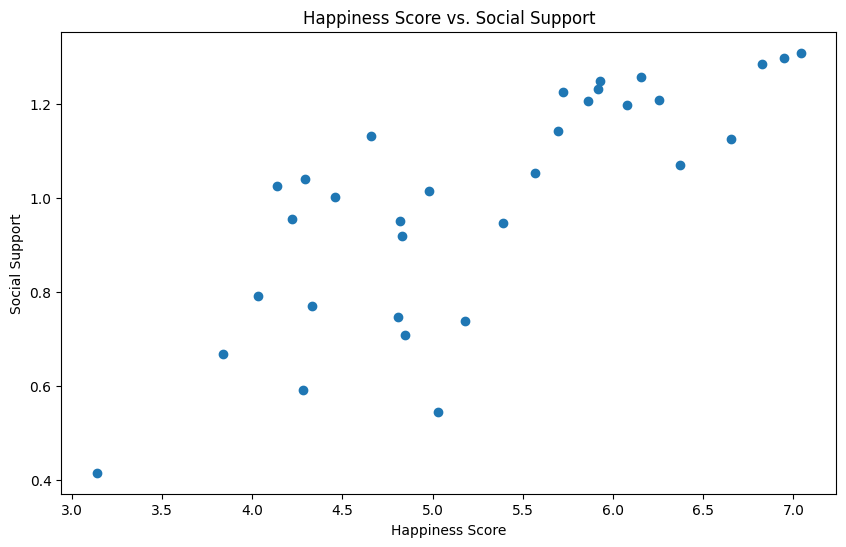

In [ ]:
x = happy_reg_pred
y = x_test['Social Support']

plt.scatter(x, y)
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')
plt.title('Happiness Score vs. Social Support')
plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
print('Linear Regression Coefficients: ')
print(happy_reg.coef_)
print('\n')
print('Linear Regression Intercept: ')
print(happy_reg.intercept_)

Linear Regression Coefficients: 
[-0.06761384  0.78720075  1.18266263  0.67349584  1.19960115  0.59490616
  0.57261064]


Linear Regression Intercept: 
2.7089978970035244


#### **Reflection Questions-Provide your answer after each question**

1. Which machine learning algorithm was best suited for this section? Why?

  - Both learning algorithms performed well in this section. The linear regression model had an MSE value of 0.2459, and the KNN model had an accuracy of 93.75%. Which model to use would ultimately depend on whether a numeric value or categorical label is desired.

2. Consider the strengths and limitations of the KNN model for predicting happiness levels in different countries. How does it handle categorical versus numerical features in the dataset?

  - The main strength of the KNN model is that it provides a label that is simple and easy to understand. While the range of the label bins allows for higher accuracy, KNN tends to be less precise when compared to numerical predictions.
  
  - KNN is best done with numerical features that are within the same scale, but the class variable must be categorical. The "Region" column of this dataset is categorical data that was encoded into numerical values but was never transformed into the same scale as the rest of the data. This could lead to less accurate results in the KNN model's predictions.

3. Reflect on the ethical considerations and potential biases associated with using machine learning models to predict happiness levels. How might the choice between KNN and linear regression impact these considerations?

  - Some of the biases within this dataset can be traced back to the survey used to gather the data. 2000-3000 people from each country returned a filled out survey. There could be inherent bias due to the types of people that would return these surveys in the first place. The surveys are likely to be biased in favor of the majority group of their particular country.

  - Another bias to note is the size of the population within each country. For smaller countries, 2000-3000 people would be very sizeable, but for other countries, that amount would be rather small. The issue with this is that, in large countries, a small group of people are speaking for the "happiness" of an entire country's population.

  - The KNN model would inherently have some bias due to how the n-nearest neighbors works. KNN would produce a label for a country based off of its nearest neighbors - feature wise - which may not be an accurate representation of that country.

<a name="p22"></a>

---
### **Part 2.2: Using the 3 Best Numerical Features**
---
It's important to note that not all features in a dataset necessarily contribute positively to a machine learning model when predicting happiness levels. Some features may be irrelevant, noisy, or even introduce biases into the model. Therefore, careful feature selection or feature engineering is essential to ensure the model focuses on the most meaningful and influential factors.
Basically, you need to repeat what you did in Part 2.1, only using three best numerical features instead of all of possible features.



When choosing the features for a model, we often want to choose those that have a strong correlation with the target variable (in this case, "Happiness Score") and are less correlated with each other to avoid multicollinearity.
Therefore, you need to analyze your data to determine what are those three features to use.

####**Finding the Three Best Independent Variables**

In [ ]:
# Load the data
happy_df.head(5)

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
0,Switzerland,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [ ]:
# droping Country column to be able to run the correlation function
check_features = happy_df.drop(['Country'], axis = 1)

In [ ]:
# Correlation
check_features.corr()

,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
Region,1.000000,-0.689062,-0.692340,-0.501211,-0.710745,-0.381365,-0.341903,-0.163055
Happiness Score,-0.689062,1.000000,0.780506,0.740265,0.724907,0.566642,0.395731,0.178843
GDP,-0.692340,0.780506,1.000000,0.645299,0.814451,0.370300,0.307885,-0.010465
Social Support,-0.501211,0.740265,0.645299,1.000000,0.531114,0.441518,0.205605,0.087513
Healthy Life Expectancy,-0.710745,0.724907,0.814451,0.531114,1.000000,0.358533,0.245383,0.107700
Freedom,-0.381365,0.566642,0.370300,0.441518,0.358533,1.000000,0.493524,0.373916
Corruption Perception,-0.341903,0.395731,0.307885,0.205605,0.245383,0.493524,1.000000,0.276123
Generosity,-0.163055,0.178843,-0.010465,0.087513,0.107700,0.373916,0.276123,1.000000


**Explain and summarize your findings here**

The three best features to use are GDP, Social Support, and Healthy Life Expectancy due to their high correlation with Happiness Score.

#### **Steps #1-7: Create the Model**

In [ ]:
# Independent and Dependent variables
happy_3_features = happy_df[['GDP', 'Social Support', 'Healthy Life Expectancy']]
happy_3_label = happy_df['Happiness Score']

**Linear Regression**

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = model_selection.train_test_split(happy_3_features, happy_3_label, test_size=0.2, random_state=42)

In [ ]:
# Initialize model
happy_3_reg = LinearRegression()

In [ ]:
# Fit model and predict
happy_3_reg.fit(x_train, y_train)
happy_3_reg_pred = happy_3_reg.predict(x_test)

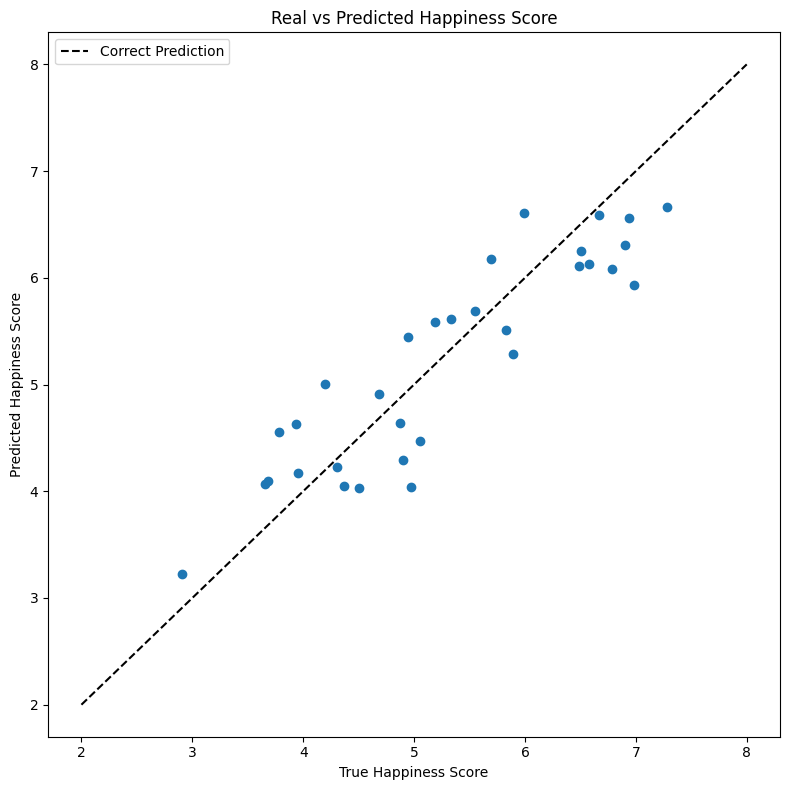

In [ ]:
# Visualization
plt.figure(figsize=(8, 8))
plt.scatter(y_test, happy_3_reg_pred)
plt.plot([2, 8], [2, 8], '--k', label="Correct Prediction")
plt.axis('tight')
plt.xlabel('True Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title("Real vs Predicted Happiness Score")
plt.legend()
plt.tight_layout()

In [ ]:
# Evaluate model
print('Mean squared: ', metrics.mean_squared_error(y_test, happy_3_reg_pred))
print('R2 score: ', metrics.r2_score(y_test, happy_3_reg_pred))

Mean squared:  0.2730690886326873
R2 score:  0.7998126072702085


**KNN**

In [ ]:
#Using the already encoded lables from Part 2.1
knn_3_label = knn_label

In [ ]:
knn_3_label.head()

0    High
1    High
2    High
3    High
4    High
Name: Happiness Score, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
# Split data
x_train, x_test, y_train, y_test = model_selection.train_test_split(happy_3_features, knn_3_label, test_size=0.2, random_state=42)

In [ ]:
#Initalize model
happy_3_knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# Fit the model
happy_3_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# predict
happy_3_knn_pred = happy_3_knn.predict(x_test)

In [ ]:
# Evaluate model
print("Accuracy Score: ", metrics.accuracy_score(y_test, happy_3_knn_pred))

Accuracy Score:  0.8125


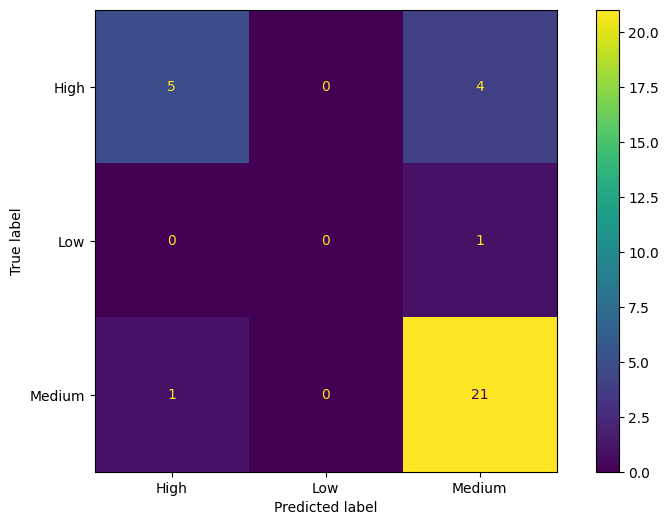

In [ ]:
# Confusion Matrix
metrics.ConfusionMatrixDisplay.from_estimator(happy_3_knn, x_test, y_test)

{1: 78.125, 3: 81.25, 5: 81.25, 7: 78.125, 9: 78.125, 11: 78.125, 13: 78.125, 15: 78.125, 17: 78.125, 19: 81.25, 21: 78.125, 23: 78.125, 25: 78.125, 27: 78.125, 29: 78.125, 31: 81.25, 33: 81.25, 35: 81.25, 37: 81.25, 39: 81.25, 41: 81.25, 43: 81.25, 45: 81.25, 47: 81.25, 49: 81.25, 51: 81.25, 53: 81.25, 55: 78.125, 57: 78.125, 59: 78.125, 61: 78.125, 63: 81.25, 65: 68.75, 67: 68.75, 69: 68.75, 71: 68.75, 73: 68.75, 75: 68.75, 77: 68.75, 79: 68.75, 81: 68.75, 83: 68.75, 85: 68.75, 87: 68.75, 89: 68.75, 91: 68.75, 93: 68.75, 95: 68.75, 97: 68.75, 99: 68.75}


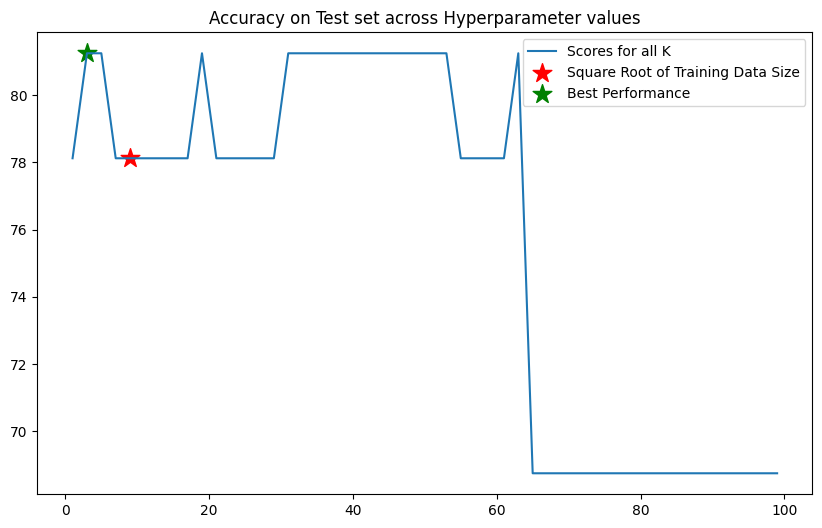

Top score of optimal classifier: 81.25
Best Value of N to use 3


In [ ]:
#KNN Hyperparameter tuning

scores = {}
for n in range(1,100,2):
  full_model = KNeighborsClassifier(n_neighbors= n)
  full_model.fit(x_train, y_train.to_numpy().reshape(-1))
  pred = full_model.predict(x_test)
  score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred) * 100
  scores[n] = score

plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# Adding the performance for K = SQRT size for reference
k = int(len(x_train)**(1/2)/2) * 2 -1
full_model = KNeighborsClassifier(n_neighbors= k)
full_model.fit(x_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(x_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred) * 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')

top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k],[top_score], color = 'g', marker = '*', s = 200, label = 'Best Performance')

plt.legend()
plt.show()

# Printing the results
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

#### **Step #8: Use the model created using three features**

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4


<br>

**NOTE**: Since we selected only the top 3 features, you will need to only provide these 3 values for each prediction. Looking at the columns in the X data could be helpful here.

**Country 1**

In [ ]:
#Create a dataframe using the Country 1 information in order to predict its happiness score
c1_3 = pd.DataFrame([[0.9, 0.4, 0.8]], columns= ['GDP', 'Social Support', 'Healthy Life Expectancy'])

In [ ]:
#Linear Regression
c1_3_reg_pred = happy_3_reg.predict(c1_3)

In [ ]:
#KNN
c1_3_knn_pred = happy_3_knn.predict(c1_3)

In [ ]:
#Prediction Outputs
print('Country 1 Linear Regression Prediction: ', c1_3_reg_pred)
print('Country 1 KNN Prediction: ', c1_3_knn_pred)

Country 1 Linear Regression Prediction:  [4.7309645]
Country 1 KNN Prediction:  ['Medium']


**Country 2**

In [ ]:
#Create a dataframe using the Country 2 information in order to predict its happiness score
c2_3 = pd.DataFrame([[0.9, 0.4, 0.8]], columns= ['GDP', 'Social Support', 'Healthy Life Expectancy'])

In [ ]:
#Linear Regression
c2_3_reg_pred = happy_3_reg.predict(c2_3)

In [ ]:
#KNN
c2_3_knn_pred = happy_3_knn.predict(c2_3)

In [ ]:
#Prediction Outputs
print('Country 2 Linear Regression Prediction: ', c2_3_reg_pred)
print('Country 2 KNN Prediction: ', c2_3_knn_pred)

Country 2 Linear Regression Prediction:  [4.7309645]
Country 2 KNN Prediction:  ['Medium']


**Country 3**

In [ ]:
#Create a dataframe using the Country 3 information in order to predict its happiness score
c3_3 = pd.DataFrame([[1.1, 0.9, 1.01]], columns= ['GDP', 'Social Support', 'Healthy Life Expectancy'])

In [ ]:
#Linear Regression
c3_3_reg_pred = happy_3_reg.predict(c3_3)

In [ ]:
#KNN
c3_3_knn_pred = happy_3_knn.predict(c3_3)

In [ ]:
#Prediction Outputs
print('Country 3 Linear Regression Prediction: ', c3_3_reg_pred)
print('Country 3 KNN Prediction: ', c3_3_knn_pred)

Country 3 Linear Regression Prediction:  [5.93632796]
Country 3 KNN Prediction:  ['Medium']


##### **2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.**

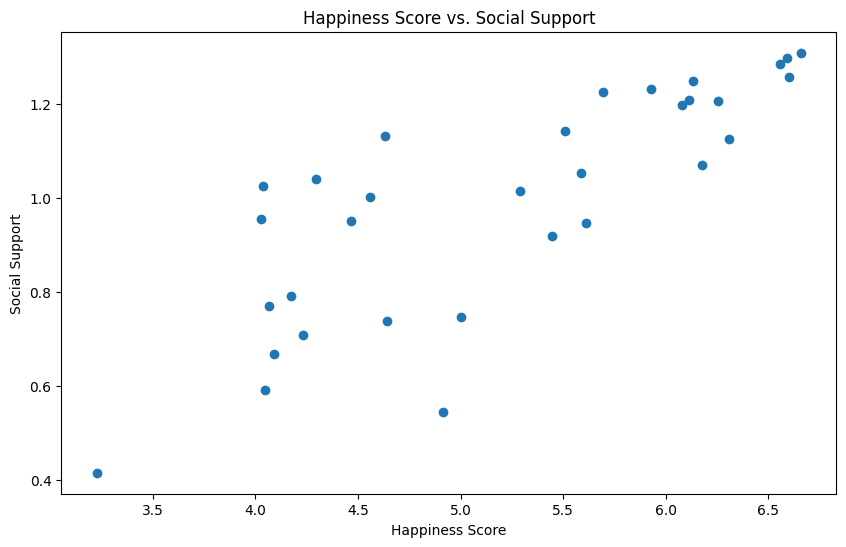

In [ ]:
x = happy_3_reg_pred
y = x_test['Social Support']

plt.scatter(x, y)
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')
plt.title('Happiness Score vs. Social Support')
plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
print('Linear Regression Coefficients: ')
print(happy_3_reg.coef_)
print('\n')
print('Linear Regression Intercept: ')
print(happy_3_reg.intercept_)

Linear Regression Coefficients: 
[0.88382662 1.51175223 1.29867629]


Linear Regression Intercept: 
2.291878617692288


#### **Reflection Questions-Provide your answer after each question**

Now that you have trained several models to accomplish this task, answer the following questions:

1. Were there any hyperparameters you need to tune and, if so, what were the best values you found?

  - The KNN algorithm has the hyperparameter "n_neighbors" that can be adjusted. After doing hyperparameter tuning, n = 3 was the best performing value.

2. Did selecting a smaller number of features improve or decrease the performance of your model?

  - Decreasing the number of features decreased the performance of the models. The MSE for linear regression increased from 0.246 to 0.273, and the accuracy of the knn model decreased from 93.75% to 81.25%.

3. What 3 variables seem to play the largest role in determining `Happiness Score` based on your work in this part?

  - The features GDP, Social Support, and Healthy Life Expectancy play the largest role in determining Happiness Score; however, including region would most likely increase the accuracy of the models compared to only including these three features.

# Sources used:
Problem 1.5: https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/

Problem 1.8: https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-a-pandas-dataframe

Problem 1.9: https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/

Part 1 Reflection Question #2: https://stackoverflow.com/questions/40183800/pandas-difference-between-largest-and-smallest-value-within-group

Visualizations: https://www.scaler.com/topics/matplotlib/scatter-plot-matplotlib/